<a href="https://colab.research.google.com/github/charlie-aashutosh/charlie/blob/master/multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr
import io

In [3]:
from google.colab import files
uploaded=files.upload()

Saving advertising.csv to advertising.csv


In [0]:
df=pd.read_csv(io.BytesIO(uploaded['advertising.csv']))

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [0]:
%matplotlib inline

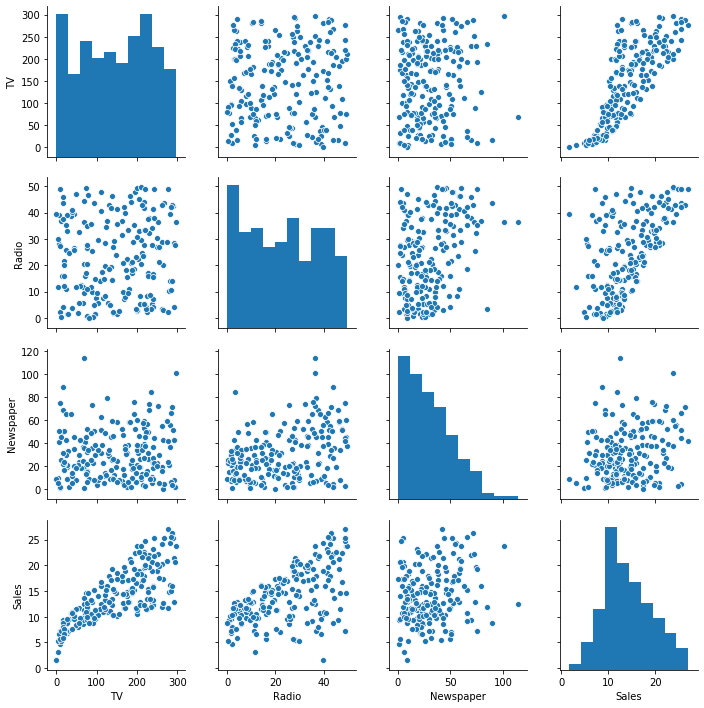

In [9]:
snr.pairplot(df)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


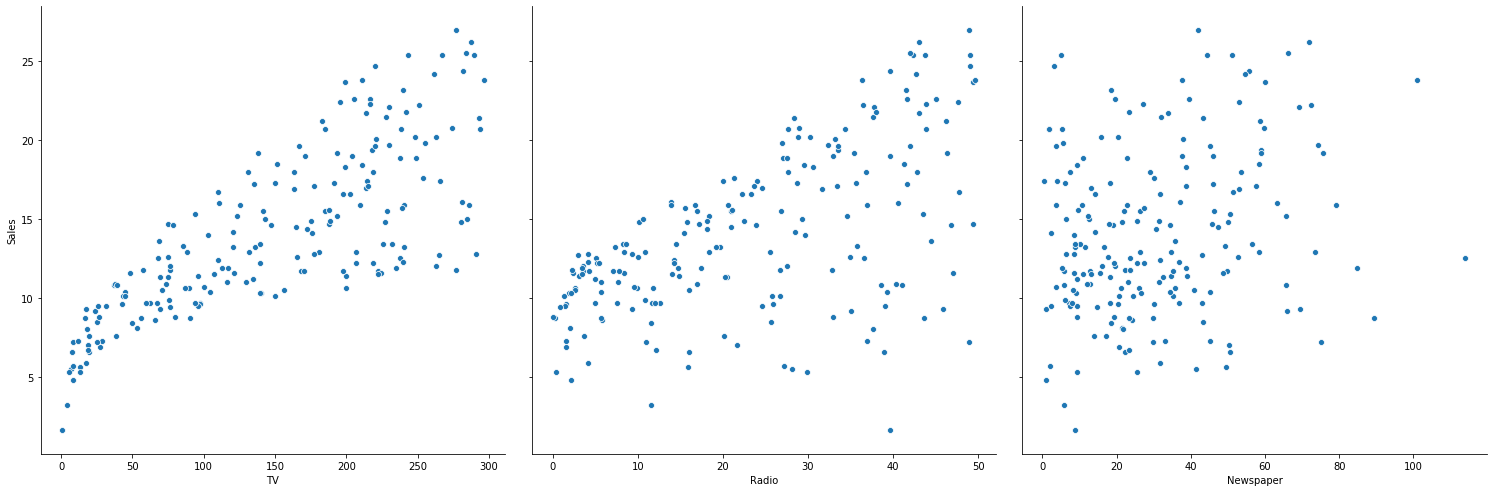

In [12]:
# plotting wrt sales only

snr.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars=['Sales'], size=7)

In [0]:
#splitting data to train and test data

x = df[['TV', 'Radio', 'Newspaper']]
y=df[['Sales']]

In [0]:
import sklearn

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

In [0]:
#performing lr

from sklearn.linear_model import LinearRegression


In [0]:
lm=LinearRegression()

In [20]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
#model evaluation

print(lm.intercept_)

[2.65278967]


In [0]:
y_pred=lm.predict(x_test)

In [0]:
from sklearn.metrics import mean_squared_error, r2_score

mse=mean_squared_error(y_test, y_pred)
r_squared=r2_score(y_test, y_pred)

In [27]:
print('mean_suared_error:' ,mse)
print('r_squared_value:', r_squared)

mean_suared_error: 1.8506819941636963
r_squared_value: 0.9058622107532246


In [28]:
import statsmodels.api as sm

x_train_sm=x_train
x_train_sm=sm.add_constant(x_train_sm)
lm_1=sm.OLS(y_train, x_train_sm).fit()

lm_1.params

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [30]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Sun, 02 Feb 2020   Prob (F-statistic):           9.97e-66
Time:                        05:41:26   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

the coefficienet value that we get for the independent variables actually denotes the amount of profit one can expect 
eg. TV=0.04568475
    Radio=0.1820239

    "this means that if the sales of radio increases by one unit, it leads to a profit or hike of 0.1820239 percentage"
     

here while constructing the ols model we forcefully add the statment "sm.add_constant where this value is actually 1 

the mlr model equation that we have i.e b0 + b1x1 = y
here we assume that b0 is multiplied by a constant lets say x0 and it has the value 1 . thats why we add the statment forcefully

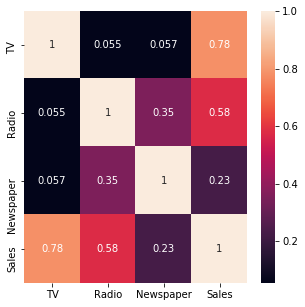

In [32]:
plt.figure(figsize=(5,5))
snr.heatmap(df.corr(), annot=True)

In [0]:
# removing the newspaper column as it has comperatively high p value hence we fail to accept it

x_train_new=x_train[['TV', 'Radio']]
x_test_new=x_test[['TV', 'Radio']]


In [34]:
lm.fit(x_train_new, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred_new=lm.predict(x_test_new)

AttributeError: ignored

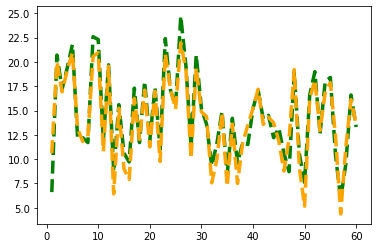

In [48]:
# actual vs predicted

c = [i for i in range(1, 61, 1)]
fig=plt.figure()
plt.plot(c, y_test, color="green", linewidth=3.5, linestyle='--')
plt.plot(c, y_pred, color="orange", linewidth=3.5, linestyle= '--')
fig.subtitle('actual and predicted', fontsize=22)
plt.xlabel('index', fontsize=20)
plt.ylable('Sales', fontsize=20)


AttributeError: ignored

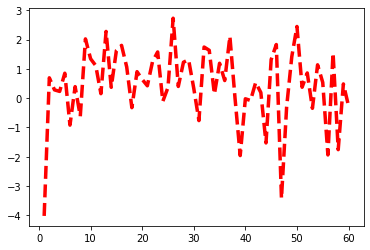

In [49]:
c = [i for i in range (1,61,1)]
fig=plt.figure()
plt.plot(c, y_test-y_pred, color="red", linewidth=3.5, linestyle='--')
plt.xlable('index', fontsize=22)
plt.ylabel('Sales', fontsize=22)

In [0]:
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_test, y_pred_new)
r_squared=r2_score(y_test, y_pred_new)

In [54]:
print('mean_squared_error:', mse)
print('r_squared_value:', r_squared)

mean_squared_error: 1.7847400520902805
r_squared_value: 0.909216449171822


In [55]:
x_train_final=x_train_new
x_train_final=sm.add_constant(x_train_final)
lm_final=sm.OLS(y_train, x_train_final).fit()



/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [56]:
print(lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Sun, 02 Feb 2020   Prob (F-statistic):           4.46e-67
Time:                        07:58:18   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.0

here we can finally write the equation as 2.7190+[0.0455*tv]+[0.1925*radio] and so on...
